<a href="https://colab.research.google.com/github/steve-burman/machine-learning-intro/blob/master/TensorFlow_SXB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow Demo
Steve Burman
303-249-1177

Python welcome message:

check installation:

In [63]:
message = "Welcome to Steve's TensorFlow Demo space"
print( message )

Welcome to Steve's TensorFlow Demo space


# Linear Regression
best fit using objective function:  y = m * x + b

In [0]:
import  matplotlib.pyplot  as plt

%tensorflow_version  2.x
import  tensorflow  as  tf
print( tf.__version__ )

from  tensorflow.keras  import Model

%matplotlib inline

def  createSimulatedData( m=0.1, b=0.3, n=100, stddev=0.1 ):
  x = tf.random.uniform( shape=( n, ) )
  noise = tf.random.normal( shape=( len(x), ), stddev=stddev )
  y = m * x + b + noise
  return x, y

def calculateLineSlope(x1, y1, x2, y2):
  dx = x2 - x1
  dy = y2 - y1
  m = dy / dx
  return m

In [0]:
m = calculateLineSlope( 6.9528, 46.3015, 7.0458, 46.1395 )
x_train, y_train = createSimulatedData( m, 46.3015, 200 )
plt.plot( x_train, y_train, 'b.' )

# Computer Vision (recognize objects in images)


Load & prepare [MNIST](https://en.wikipedia.org/wiki/MNIST_database) dataset, which is many "Labelled" image files of hand-written digits.
![MNIST dataset](https://miro.medium.com/max/479/1*yBdJCRwIJGoM7pwU-LNW6Q.png)

In [1]:
import  matplotlib.pyplot  as plt

%tensorflow_version  2.x
import  tensorflow  as  tf
print( tf.__version__ )

from  tensorflow.keras  import Model

%matplotlib inline


mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


TensorFlow 2.x selected.
2.1.0-rc1
11493376/11490434 [==============================] - 0s 0us/step


Build "Model" using Keras, which calls TensorFlow implementation:

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


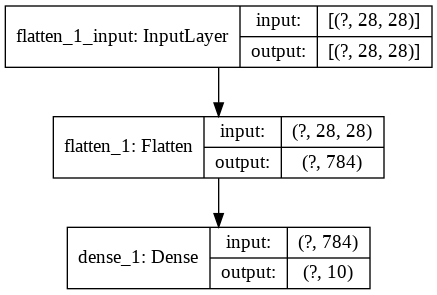

In [60]:
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Flatten( input_shape=[28, 28] )
    #  , tf.keras.layers.Dense( 128, activation='relu' )
    #  , tf.keras.layers.Dropout( 0.2 )
     , tf.keras.layers.Dense( 10, activation='softmax' )
    ]
)

model.compile(
    optimizer = 'adam'
    , loss = 'sparse_categorical_crossentropy'
    , metrics = [ 'accuracy' ]
)

# writer = tf.summary.create_file_writer( logdir="/tmp/mnist_demo/1" )

model.summary()
tf.keras.utils.plot_model( model, 'skip_connection.png', show_shapes=True )

Train & evaluate model:

In [61]:
history = model.fit( x_train, y_train, validation_data=(x_test, y_test), epochs=5 )
history

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.4712 - accuracy: 0.8772 - val_loss: 0.3074 - val_accuracy: 0.9159
Epoch 2/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3041 - accuracy: 0.9146 - val_loss: 0.2802 - val_accuracy: 0.9221
Epoch 3/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2837 - accuracy: 0.9200 - val_loss: 0.2753 - val_accuracy: 0.9217
Epoch 4/5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2735 - accuracy: 0.9239 - val_loss: 0.2696 - val_accuracy: 0.9256
Epoch 5/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2667 - accuracy: 0.9251 - val_loss: 0.2683 - val_accuracy: 0.9249


In [4]:
eval_results = model.evaluate( x_test, y_test )
eval_results

10000/10000 [==============================] - 0s 34us/sample - loss: 0.2644 - accuracy: 0.9253


[0.26435359268784525, 0.9253]

Show "learning" progress:

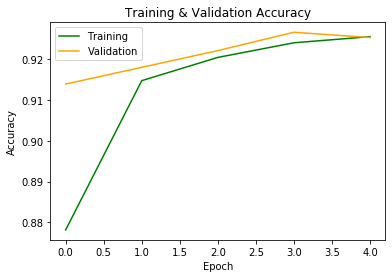

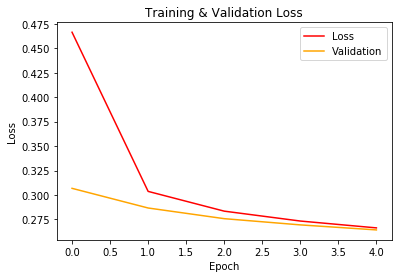

<Figure size 432x288 with 0 Axes>

In [14]:
accuracy     = history.history[     'accuracy' ]
val_accuracy = history.history[ 'val_accuracy' ]
loss     = history.history[     'loss' ]
val_loss = history.history[ 'val_loss' ]
epochs = range( len( accuracy ) )

plt.title( 'Training & Validation Accuracy' )
plt.plot( epochs,     accuracy, color='green',   label='Training' )
plt.plot( epochs, val_accuracy, color='orange', label='Validation' )
plt.xlabel( 'Epoch' )
plt.ylabel( 'Accuracy' )
plt.legend()
_ = plt.figure()

plt.title( 'Training & Validation Loss' )
plt.plot( epochs,     loss, color='red', label='Loss' )
plt.plot( epochs, val_loss, color='orange', label='Validation' )
plt.xlabel( 'Epoch' )
plt.ylabel( 'Loss' )
plt.legend()
_ = plt.figure()


Show Weights:

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


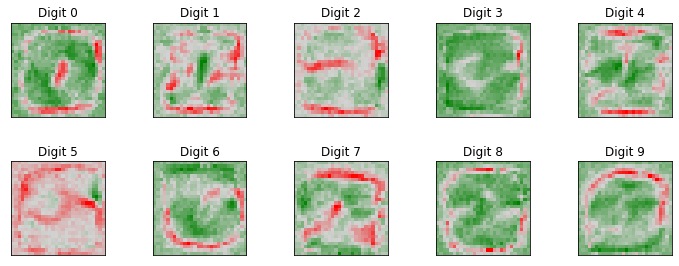

In [59]:
from  matplotlib.colors import LinearSegmentedColormap

model.summary()

def  show_layer_weights(p_digit_number):
  dense_layer = model.layers[1]
  weights_inspect = dense_layer.get_weights()[0]
  dense_layer_weights = []
  for connection in weights_inspect:
    weight = connection[ p_digit_number ]
    dense_layer_weights.append( weight )
  dense_layer_weights
  img = tf.reshape( dense_layer_weights, [28, 28] )
  # plt.imshow( img, cmap = cmap )
  return img

fig, axes = plt.subplots( 2, 5, figsize=(10, 4) )
fig.tight_layout()
axes = axes.reshape(-1)
for digit_number in range( 0, 10 ):
  title = "Digit " + str( digit_number )
  a = axes[ digit_number ]
  img = show_layer_weights( digit_number )
  a.imshow( img, cmap = cmap )
  cmap = LinearSegmentedColormap.from_list( 'rg', ["red", "lightgray", "green"], N=256 )
  a.set_title( title )
  a.set_xticks(()) # ticks be gone
  a.set_yticks(())
plt.show()


# Convolution

Setup...

In [193]:
import scipy
from skimage  import color, data

%matplotlib inline
import matplotlib.pyplot as plt

%tensorflow_version  2.x
import  tensorflow  as  tf
print( tf.__version__ )

from  tensorflow.keras  import Model


2.1.0-rc1


Load Data

Text(0.5, 1.0, 'Eileen Collins, 1st Woman Shuttle Commander')

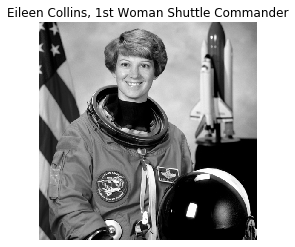

In [194]:
img = data.astronaut()
img = color.rgb2gray( img )
plt.axis( 'off' )
plt.imshow( img, cmap=plt.cm.gray )
plt.title( 'Eileen Collins, 1st Woman Shuttle Commander' )

Build Model:

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Edges_from_Pixels (Conv2D)   (None, 7, 7, 4)           196       
_________________________________________________________________
Shapes_from_Edges (Conv2D)   (None, 5, 5, 8)           296       
Total params: 492
Trainable params: 492
Non-trainable params: 0
_________________________________________________________________


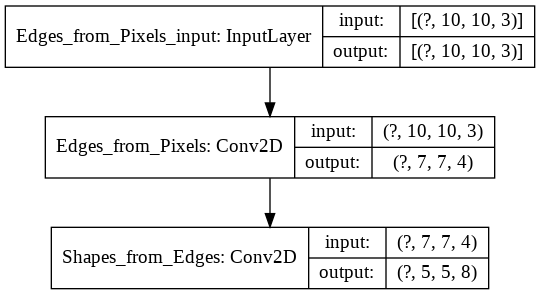

In [62]:
model = tf.keras.models.Sequential()

model.add(
    tf.keras.layers.Conv2D( name = 'Edges_from_Pixels'
        , filters = 4
        , kernel_size = ( 4, 4 )
        , input_shape = ( 10, 10, 3 )
    )
)

model.add(
    tf.keras.layers.Conv2D( name = 'Shapes_from_Edges'
        , filters = 8
        , kernel_size = ( 3, 3 )
    )
)

model.summary()
tf.keras.utils.plot_model( model, 'skip_connection.png', show_shapes=True )
